In [42]:
import pandas as pd
from numpy import median
import numpy as np

In [43]:
team_name="DC"
team_df=pd.read_csv(f"{team_name}.csv")
final_compare_df = pd.DataFrame()
team_df.head()

,Unnamed: 0,p1,p2,r1,r2,lead,follower,larger_score,total_score,performance
0,0,S Dhawan,PP Shaw,18.0,9.0,S Dhawan,PP Shaw,18.0,27.0,0.666420
1,1,S Dhawan,RR Pant,12.5,21.0,RR Pant,S Dhawan,21.0,33.5,0.626679
2,2,MP Stoinis,RR Pant,14.0,4.0,MP Stoinis,RR Pant,14.0,18.0,0.777346
3,3,SO Hetmyer,RR Pant,16.0,20.5,RR Pant,SO Hetmyer,20.5,36.5,0.561490
4,4,S Dhawan,AM Rahane,5.0,6.0,AM Rahane,S Dhawan,6.0,11.0,0.544959


In [44]:
team_df.p1.unique()

array(['S Dhawan', 'MP Stoinis', 'SO Hetmyer', 'AM Rahane', 'Lalit Yadav',
       'TK Curran', 'CR Woakes', 'R Ashwin', 'RR Pant', 'SPD Smith',
       'SS Iyer', 'AR Patel', 'K Rabada'], dtype=object)

In [45]:
import networkx as nx
team_df1=team_df.copy()
team_df1['lead']=team_df['follower']
team_df1['follower']=team_df['lead']
team_df1.head()
team_df1=pd.concat([team_df,team_df1])


In [46]:
G_UnDirected=nx.from_pandas_edgelist(team_df1, "follower", "lead", ['performance'])

# get edge weights
_, wt1 = zip(*nx.get_edge_attributes(G_UnDirected, 'performance').items())


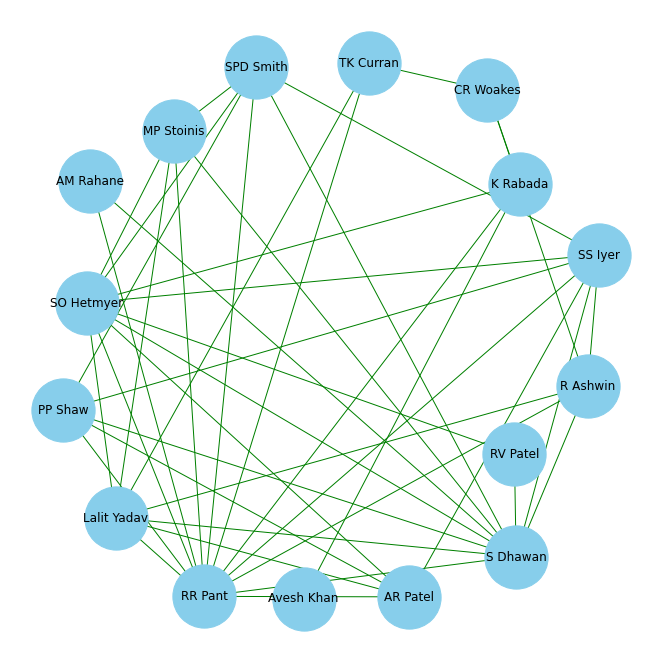

In [47]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_UnDirected, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_UnDirected, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_UnDirected.edges(), edge_color='g')
plt.savefig(f"Graphs/{team_name}/{team_name}_UnDirected.png", format="PNG")
plt.show()

In [48]:
import networkx as nx
# construct graph
G_Directed = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# get edge weights
_, wt = zip(*nx.get_edge_attributes(G_Directed, 'performance').items())

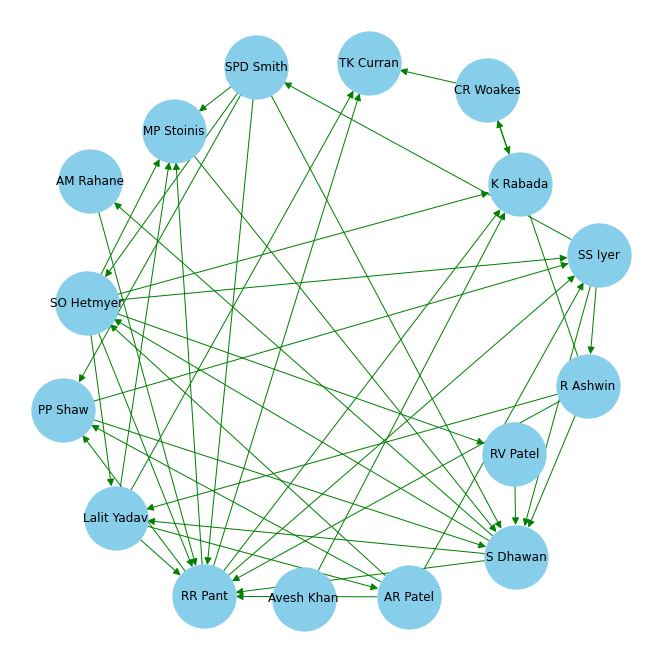

In [49]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_Directed, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_Directed, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_Directed.edges(), edge_color='g', arrowsize=15)
plt.savefig(f"Graphs/{team_name}/{team_name}_Directed.png", format="PNG")
plt.show()

# Degree of each node of graph

In [50]:
print("Degree of above Network:")
print(G_Directed.degree(),"\n")
deg=G_Directed.degree()

Degree of above Network:
[('PP Shaw', 5), ('S Dhawan', 10), ('RR Pant', 12), ('MP Stoinis', 5), ('SO Hetmyer', 9), ('AM Rahane', 2), ('Lalit Yadav', 7), ('TK Curran', 3), ('CR Woakes', 3), ('R Ashwin', 5), ('K Rabada', 4), ('SPD Smith', 6), ('SS Iyer', 7), ('AR Patel', 5), ('Avesh Khan', 1), ('RV Patel', 2)] 



In [51]:
min_name,min_degree=min(deg,key=lambda deg:deg[1])
s=min_name+": "+str(min_degree)
print(s)
final_compare_df['Min_degree_name']=[min_name]
final_compare_df['Min_degree']=[min_degree]

max_name,max_degree=max(deg,key=lambda deg:deg[1])
s=max_name+": "+str(max_degree)
# print(s)
# final_compare_df['Max_Indegree_name']=[s]
print(s)
final_compare_df['Max_degree_name']=[max_name]
final_compare_df['Max_degree']=[max_degree]


Avesh Khan: 1
RR Pant: 12


# In-degree of each node of the graph

In [52]:
print(G_Directed.in_degree())


[('PP Shaw', 3), ('S Dhawan', 6), ('RR Pant', 7), ('MP Stoinis', 4), ('SO Hetmyer', 3), ('AM Rahane', 1), ('Lalit Yadav', 3), ('TK Curran', 3), ('CR Woakes', 1), ('R Ashwin', 1), ('K Rabada', 4), ('SPD Smith', 1), ('SS Iyer', 4), ('AR Patel', 1), ('Avesh Khan', 0), ('RV Patel', 1)]


In [53]:
indeg=G_Directed.in_degree()
min_name,min_indegree=min(indeg,key=lambda indeg:indeg[1])
s=min_name+": "+str(min_indegree)
# print(s)
final_compare_df['Min_Indegree_name']=[s]

In [54]:

max_name,max_indegree=max(indeg,key=lambda indeg:indeg[1])
s=max_name+": "+str(max_indegree)
# print(s)
final_compare_df['Max_Indegree_name']=[s]



# Out-degree of each node of the graph

In [55]:
print(G_Directed.out_degree())

[('PP Shaw', 2), ('S Dhawan', 4), ('RR Pant', 5), ('MP Stoinis', 1), ('SO Hetmyer', 6), ('AM Rahane', 1), ('Lalit Yadav', 4), ('TK Curran', 0), ('CR Woakes', 2), ('R Ashwin', 4), ('K Rabada', 0), ('SPD Smith', 5), ('SS Iyer', 3), ('AR Patel', 4), ('Avesh Khan', 1), ('RV Patel', 1)]


In [56]:
Out=G_Directed.out_degree()
min_name,min_outdegree=min(Out,key=lambda Out:Out[1])
s=min_name+": "+str(min_outdegree)
# print(s)
final_compare_df['Min_Outdegree_name']=[s]

In [57]:
max_name,max_outdegree=max(Out,key=lambda Out:Out[1])
s=max_name+": "+str(max_outdegree)
# print(s)
final_compare_df['Max_Outdegree_name']=[s]



# Normalized Degree Centrality

In [58]:
print(nx.degree_centrality(G_Directed))

{'PP Shaw': 0.3333333333333333, 'S Dhawan': 0.6666666666666666, 'RR Pant': 0.8, 'MP Stoinis': 0.3333333333333333, 'SO Hetmyer': 0.6, 'AM Rahane': 0.13333333333333333, 'Lalit Yadav': 0.4666666666666667, 'TK Curran': 0.2, 'CR Woakes': 0.2, 'R Ashwin': 0.3333333333333333, 'K Rabada': 0.26666666666666666, 'SPD Smith': 0.4, 'SS Iyer': 0.4666666666666667, 'AR Patel': 0.3333333333333333, 'Avesh Khan': 0.06666666666666667, 'RV Patel': 0.13333333333333333}


# Closeness Centrality

In [59]:
print(nx.closeness_centrality(G_Directed))

{'PP Shaw': 0.3841269841269841, 'S Dhawan': 0.4745098039215686, 'RR Pant': 0.5377777777777777, 'MP Stoinis': 0.4033333333333333, 'SO Hetmyer': 0.36666666666666664, 'AM Rahane': 0.32266666666666666, 'Lalit Yadav': 0.36666666666666664, 'TK Curran': 0.41728395061728396, 'CR Woakes': 0.23414634146341462, 'R Ashwin': 0.27816091954022987, 'K Rabada': 0.4666666666666667, 'SPD Smith': 0.27816091954022987, 'SS Iyer': 0.4033333333333333, 'AR Patel': 0.26021505376344084, 'Avesh Khan': 0.0, 'RV Patel': 0.26021505376344084}


# Betweenness Centrality 

In [60]:
print(nx.betweenness_centrality(G_Directed,normalized=True))

{'PP Shaw': 0.02380952380952381, 'S Dhawan': 0.255952380952381, 'RR Pant': 0.1988095238095238, 'MP Stoinis': 0.02698412698412699, 'SO Hetmyer': 0.11309523809523811, 'AM Rahane': 0.0, 'Lalit Yadav': 0.06944444444444445, 'TK Curran': 0.0, 'CR Woakes': 0.005555555555555556, 'R Ashwin': 0.06746031746031747, 'K Rabada': 0.0, 'SPD Smith': 0.024206349206349207, 'SS Iyer': 0.17579365079365084, 'AR Patel': 0.02142857142857143, 'Avesh Khan': 0.0, 'RV Patel': 0.0031746031746031746}


# Reciprocity

In [61]:
print(nx.reciprocity(G_Directed))

0.0


# Density

In [62]:
print(nx.density(G_Directed))



0.17916666666666667


In [63]:
final_compare_df['Density']=[nx.density(G_Directed)]


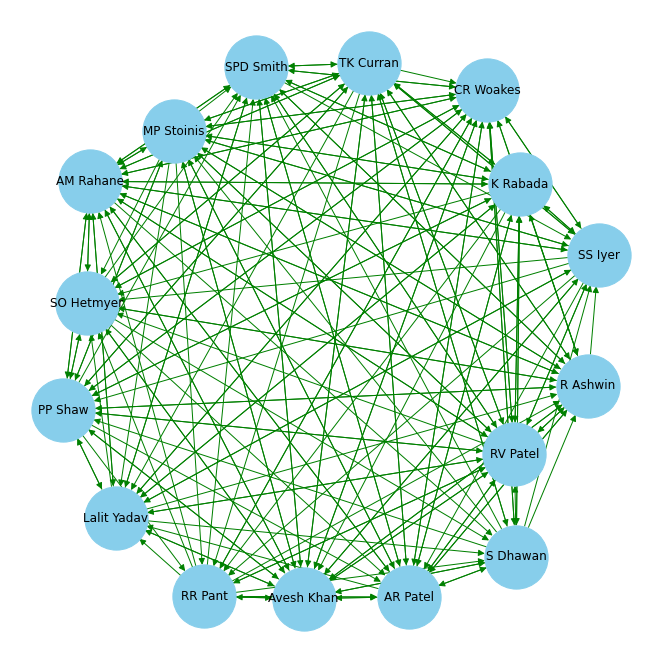

In [64]:
G_C = nx.complement(G_Directed)
# plot graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_C, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_C, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_C.edges(), edge_color='g', arrowsize=13)
plt.savefig(f"Graphs/{team_name}/{team_name}_Complement.png", format="PNG")
plt.show()

# Shortest path lengths between all pairs

In [65]:
shortest_paths=nx.all_pairs_shortest_path_length(G_Directed)
shortest_paths_list=list(shortest_paths)
print(shortest_paths_list)

[('PP Shaw', {'PP Shaw': 0, 'S Dhawan': 1, 'SS Iyer': 1, 'AM Rahane': 2, 'Lalit Yadav': 2, 'RR Pant': 2, 'R Ashwin': 2, 'SO Hetmyer': 2, 'SPD Smith': 2, 'CR Woakes': 3, 'K Rabada': 3, 'TK Curran': 3, 'MP Stoinis': 3, 'AR Patel': 3, 'RV Patel': 3}), ('S Dhawan', {'S Dhawan': 0, 'RR Pant': 1, 'AM Rahane': 1, 'Lalit Yadav': 1, 'SO Hetmyer': 1, 'K Rabada': 2, 'MP Stoinis': 2, 'TK Curran': 2, 'AR Patel': 2, 'SS Iyer': 2, 'PP Shaw': 2, 'RV Patel': 2, 'R Ashwin': 3, 'SPD Smith': 3, 'CR Woakes': 4}), ('RR Pant', {'RR Pant': 0, 'K Rabada': 1, 'MP Stoinis': 1, 'TK Curran': 1, 'SS Iyer': 1, 'PP Shaw': 1, 'SPD Smith': 2, 'S Dhawan': 2, 'R Ashwin': 2, 'AM Rahane': 3, 'Lalit Yadav': 3, 'CR Woakes': 3, 'SO Hetmyer': 3, 'AR Patel': 4, 'RV Patel': 4}), ('MP Stoinis', {'MP Stoinis': 0, 'S Dhawan': 1, 'RR Pant': 2, 'AM Rahane': 2, 'Lalit Yadav': 2, 'SO Hetmyer': 2, 'K Rabada': 3, 'TK Curran': 3, 'AR Patel': 3, 'SS Iyer': 3, 'PP Shaw': 3, 'RV Patel': 3, 'R Ashwin': 4, 'SPD Smith': 4, 'CR Woakes': 5}), ('S

# Diameter of the Complemented Undirected Network

In [66]:
print(nx.diameter(G_UnDirected))

3


In [67]:
final_compare_df['Diameter']=[nx.diameter(G_UnDirected)]


# Eccentricty of all the nodes of the Undirected Network


In [68]:
dict_ecc=dict(nx.eccentricity(G_UnDirected))
print(dict_ecc)

{'PP Shaw': 3, 'S Dhawan': 3, 'RR Pant': 2, 'MP Stoinis': 3, 'SO Hetmyer': 2, 'AM Rahane': 3, 'Lalit Yadav': 3, 'TK Curran': 3, 'CR Woakes': 3, 'R Ashwin': 3, 'K Rabada': 2, 'SPD Smith': 3, 'SS Iyer': 3, 'AR Patel': 3, 'Avesh Khan': 3, 'RV Patel': 3}


# Implementing the Girvan-Newman Algorithm for Community Detection in Python

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg


# find communities in the graph
c = girvan_newman(G_UnDirected.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

print(node_groups)  #printing the communities in the form of lists

[['AM Rahane', 'Lalit Yadav', 'CR Woakes', 'RR Pant', 'S Dhawan', 'AR Patel', 'MP Stoinis', 'TK Curran', 'R Ashwin', 'SO Hetmyer', 'SS Iyer', 'PP Shaw', 'SPD Smith', 'RV Patel'], ['K Rabada', 'Avesh Khan']]


# Plotting the communities

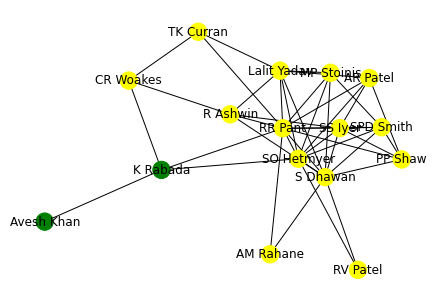

In [70]:
color_map = []
for node in G_UnDirected:
    if node in node_groups[0]:
        color_map.append('yellow')
    else: 
        color_map.append('green') 

nx.draw(G_UnDirected, node_color=color_map, with_labels=True)
plt.savefig(f"Graphs/{team_name}/{team_name}_Community.png", format="PNG")
plt.show()

# Clustering 

In [71]:
import networkx as nx

# returns a Dictionary with clustering value of each node
print(nx.clustering(G_UnDirected))
 
# This returns clustering value of specified node
print("\nRR Pant:",nx.clustering(G_UnDirected, 'RR Pant'))

{'PP Shaw': 0.8, 'S Dhawan': 0.4444444444444444, 'RR Pant': 0.3787878787878788, 'MP Stoinis': 0.9, 'SO Hetmyer': 0.4722222222222222, 'AM Rahane': 1.0, 'Lalit Yadav': 0.5238095238095238, 'TK Curran': 0.3333333333333333, 'CR Woakes': 0, 'R Ashwin': 0.5, 'K Rabada': 0.16666666666666666, 'SPD Smith': 0.8, 'SS Iyer': 0.6666666666666666, 'AR Patel': 0.7, 'Avesh Khan': 0, 'RV Patel': 1.0}

RR Pant: 0.3787878787878788


# Graph connectivity measures

In [72]:
print(nx.is_connected(G_UnDirected))
 
# returns number of different connected components
print(nx.number_connected_components(G_UnDirected))
 
# returns list of nodes in different connected components
print(list(nx.connected_components(G_UnDirected)))
 
# returns list of nodes of component containing given node
print(nx.node_connected_component(G_UnDirected, 'RR Pant'))
 
# returns number of nodes to be removed so that Graph becomes disconnected
print(nx.node_connectivity(G_UnDirected))
 
# returns number of edges to be removed so that Graph becomes disconnected
print(nx.edge_connectivity(G_UnDirected))

True
1
[{'Lalit Yadav', 'AM Rahane', 'CR Woakes', 'RR Pant', 'K Rabada', 'S Dhawan', 'AR Patel', 'MP Stoinis', 'TK Curran', 'R Ashwin', 'SO Hetmyer', 'SS Iyer', 'PP Shaw', 'SPD Smith', 'RV Patel', 'Avesh Khan'}]
{'Lalit Yadav', 'AM Rahane', 'CR Woakes', 'RR Pant', 'K Rabada', 'S Dhawan', 'MP Stoinis', 'AR Patel', 'TK Curran', 'R Ashwin', 'SO Hetmyer', 'PP Shaw', 'SS Iyer', 'SPD Smith', 'RV Patel', 'Avesh Khan'}
1
1


# Modularity of the graph

In [73]:
import networkx.algorithms.community as nx_comm
print(nx_comm.modularity(G_UnDirected, node_groups))
print(nx_comm.modularity(G_UnDirected, nx_comm.label_propagation_communities(G_UnDirected)))

0.03975121687398585
0.0


In [74]:
final_compare_df['Modularity']= nx_comm.modularity(G_UnDirected, node_groups)


In [75]:
# !pip install --upgrade scipy networkx

# Pagerank

In [76]:
import networkx as nx
pr1 = nx.pagerank(G_UnDirected, 1) # component of vector x = 1
pr2 = nx.pagerank(G_UnDirected, 0.5)  # component of vector x = 0.5
# print(pr1)
s1="Node " +str(max(pr1))+" = "+ str(pr1[max(pr1)])
print(s1)
s2="Node " +str(max(pr2))+" = "+ str(pr2[max(pr2)])
# print(pr2)
print(s2)


Node TK Curran = 0.03488447807168463
Node TK Curran = 0.04965956311708039


In [77]:
final_compare_df['Page Rank(x=1)']=s1
final_compare_df['Page Rank(x=0.5)']=s2
print(final_compare_df.T)

                                                       0
Min_degree_name                               Avesh Khan
Min_degree                                             1
Max_degree_name                                  RR Pant
Max_degree                                            12
Min_Indegree_name                          Avesh Khan: 0
Max_Indegree_name                             RR Pant: 7
Min_Outdegree_name                          TK Curran: 0
Max_Outdegree_name                         SO Hetmyer: 6
Density                                         0.179167
Diameter                                               3
Modularity                                      0.039751
Page Rank(x=1)      Node TK Curran = 0.03488447807168463
Page Rank(x=0.5)    Node TK Curran = 0.04965956311708039


In [78]:

final_compare_df.to_csv(f"Graphs/{team_name}/{team_name}.csv")